In [1]:
from keras import models, layers
import numpy as np
from keras.datasets import imdb

ModuleNotFoundError: No module named 'keras'

In [2]:
(train_reviews, train_labels), (test_reviews, test_labels) = imdb.load_data()


In [7]:
train_reviews

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [8]:
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for index, sequence in enumerate(sequences):
        for s in sequence:
            if s < dimension:
                results[index, s] = 1
    return results

In [10]:
x_train = vectorize_sequence(train_reviews)
x_test = vectorize_sequence(test_reviews)

In [12]:
x_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [13]:

y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

In [14]:
x_train_training = x_train[:10000]
y_train_training = y_train[:10000]
x_train_validation = x_train[10000:]
y_train_validation = y_train[10000:]

In [15]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

c:\Users\Shiraz Mazhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
modelHistory = model.fit(x_train_training, y_train_training, epochs=20, batch_size=512, validation_data=(x_train_validation,y_train_validation))


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.6517 - loss: 0.6365 - val_accuracy: 0.8533 - val_loss: 0.4646
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8812 - loss: 0.4047 - val_accuracy: 0.8625 - val_loss: 0.3726
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9138 - loss: 0.2870 - val_accuracy: 0.8801 - val_loss: 0.3142
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9423 - loss: 0.2163 - val_accuracy: 0.8852 - val_loss: 0.2959
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9518 - loss: 0.1734 - val_accuracy: 0.8840 - val_loss: 0.2888
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9671 - loss: 0.1364 - val_accuracy: 0.8815 - val_loss: 0.2993
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9697 - loss: 0.1181 - val_accuracy: 0.8816 - val_loss: 0.3049
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9791 - loss: 0.0932 - val_accuracy: 0.8733 - val_los

In [18]:
loss = modelHistory.history['loss']
val_loss = modelHistory.history['val_loss']
accuracy = modelHistory.history['accuracy']
val_accuracy = modelHistory.history['val_accuracy']

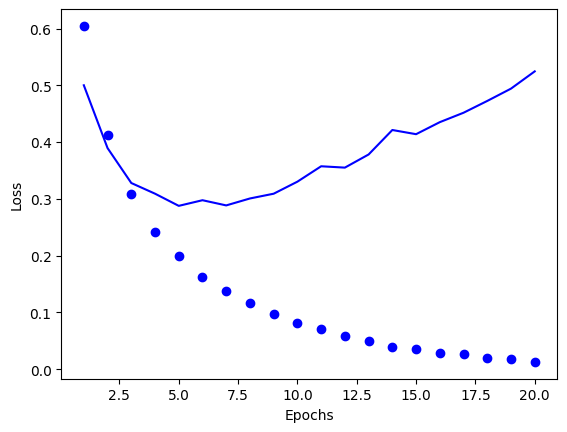

In [17]:

import matplotlib.pyplot as plt
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='Train Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

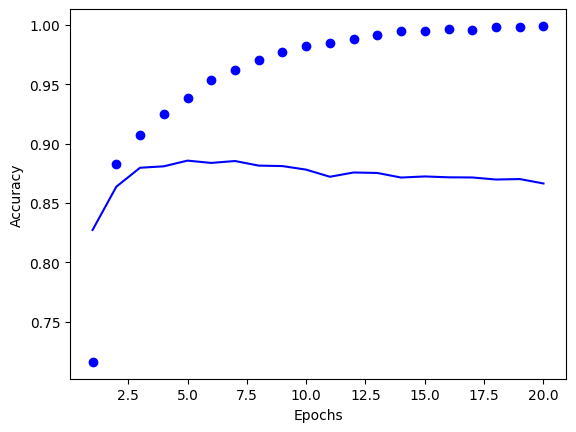

In [18]:
plt.plot(epochs, accuracy,'bo',label='Train Accuracy')
plt.plot(epochs, val_accuracy,'b',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()